In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
def loadChars(extras):
    x_chars = np.empty([1, 28, 28])
    amount = 1000
    for extra in extras:
        if 'train' in extra:
            amount = 6000
        for i in range(amount):
            char = cv2.imread(extra + str(i + 1) + ".png", 2)
            imInv = cv2.bitwise_not(char)
            x_chars = np.append(x_chars, [imInv], axis=0)

    return x_chars

x_testX = loadChars(["./test/sum/sum_", "./test/x/x_", "./test/min/min_"])
print(x_testX.shape)
x_trainX = loadChars(["./train/sum/sum_", "./train/x/x_", "./train/min/min_"])
print(x_trainX.shape)

(3001, 28, 28)
(18001, 28, 28)


(78001, 28, 28)
(13001, 28, 28)


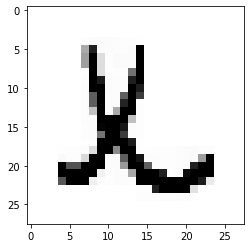

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.append(x_train, x_trainX, axis=0)
x_test = np.append(x_test, x_testX, axis=0)

print(x_train.shape)
print(x_test.shape)

plt.imshow(x_train[70000], cmap=plt.cm.binary)

In [4]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)


In [5]:
# Convert array of labeled data to a 'one-hot vector'
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train[0])
print(y_test.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)


In [6]:
y_train = np.insert(y_train, 9, 0 ,axis=1)
y_train = np.insert(y_train, 9, 0 ,axis=1)
y_train = np.insert(y_train, 9, 0 ,axis=1)

y_test = np.insert(y_test, 9, 0 ,axis=1)
y_test = np.insert(y_test, 9, 0 ,axis=1)
y_test = np.insert(y_test, 9, 0 ,axis=1)

print(y_train[9000])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
y_trainX = np.zeros([1, 13])
for i in range(18000):
    if i < 6000:
        y_trainX = np.append(y_trainX, [[0,0,0,0,0,0,0,0,0,0,1,0,0]], axis=0)
    elif i >= 6000 and i < 12000:
        y_trainX = np.append(y_trainX, [[0,0,0,0,0,0,0,0,0,0,0,1,0]], axis=0)        
    else:
        y_trainX = np.append(y_trainX, [[0,0,0,0,0,0,0,0,0,0,0,0,1]], axis=0)

y_testX = np.zeros([1, 13])
for i in range(3000):
    if i < 1000:
        y_testX = np.append(y_testX, [[0,0,0,0,0,0,0,0,0,0,1,0,0]], axis=0)
    elif i >= 1000 and i < 2000:
        y_testX = np.append(y_testX, [[0,0,0,0,0,0,0,0,0,0,0,1,0]], axis=0)        
    else:
        y_testX = np.append(y_testX, [[0,0,0,0,0,0,0,0,0,0,0,0,1]], axis=0)

print(y_trainX[12000])
print(y_testX.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(3001, 13)


In [8]:
y_train = np.append(y_train, y_trainX, axis=0)
y_test = np.append(y_test, y_testX, axis=0)

(78001, 28, 28)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


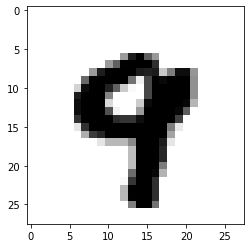

In [17]:
# Randomize arrays
randomize = np.arange(len(x_train))
np.random.shuffle(randomize)
x_train = x_train[randomize]
y_train = y_train[randomize]
print(x_train.shape)
print(y_train[70216])
plt.imshow(x_train[70216], cmap=plt.cm.binary)

In [18]:
x_train = x_train.reshape(78001, 1, 28, 28)/255
x_test = x_test.reshape(13001, 1, 28, 28)/255


In [23]:
# Model Structure
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(1, 28, 28), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(13, activation='softmax'))
print(model.summary())

# Train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)
# Test
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))

model.save('./CNN_chars.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               57600     
_________________________________________________________________
dense_6 (Dense)              (None, 13)                3341      
Total params: 69,037
Trainable params: 69,037
Non-trainable params: 0
_________________________________________________________________
None


ValueError: Error when checking input: expected conv2d_4_input to have 4 dimensions, but got array with shape (78001, 784)